# Experimento 3 - Comparação com ReAct com Prompt Enriquecido

**Objetivo**: Avaliar se a separação explícita da etapa de personalização, proposta no \textit{PersonaReAct}, resulta em respostas mais organizadas, concisas e claras do que a personalização direta por prompt no ReAct tradicional.

**Metodologia**
* Escolher 4 perfis diferentes
* Escolher 1 pergunta para cada perfil
  * Responder cada pergunta com o ReAct com Prompt Enriquecido e com o PersonaReAct
* Submeter o par de respostas (com ReAct com Prompt Enriquecido e com o PersonaReAct) à LLM avaliadora.

Critérios de avaliação da LLM:
* Vocabulário Específico Ao Perfil,
* Foco Informacional Adaptado,
* Organizacao Textual Por Perfil,
* Adaptacao Explícita De Linguagem,
* Coerencia Perfil Resposta,
* Sinais Claros De Personalizacao,

Cada critério foi aplicado 20 vezes para cada resposta e uma média foi calculada.

# Importação de bibliotecas

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Importação dos Resultados

O arquivo de resultados é composto pelas pontuações (scores) geradas pelo G-Eval para cada um dos 7 critérios elaborados.

A pergunta foi feita utilizando o padrão ReAct e o padrão PersonaReAct para cada perfil listado abaixo.

Cada pontuação foi calculada 20 vezes e os seus resultados salvos nas listas ```scores_personareact``` e ```scores_react_prompt```.

## Torcedor do time

Pergunta: "Bruno Pacheco foi bem no jogo contra o Ceará no dia 1º de abril de 2023 ou deixou a desejar?"


In [4]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_3_torcedor.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,8.94,5.55,3.39
1,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,8.96,5.64,3.32
2,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,8.91,5.67,3.24
3,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,8.94,5.57,3.37
4,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,8.89,5.71,3.18


In [5]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.22,0.03,5.80,0.15
1,CoerenciaPerfilResposta,9.00,0.08,3.98,0.21
2,FocoInformacionalAdaptado,9.15,0.02,8.17,0.05
3,OrganizacaoTextualPorPerfil,8.91,0.03,7.58,0.04
4,SinaisClarosDePersonalizacao,8.73,0.06,4.32,0.22
5,VocabulárioEspecíficoAoPerfil,8.94,0.02,5.73,0.24


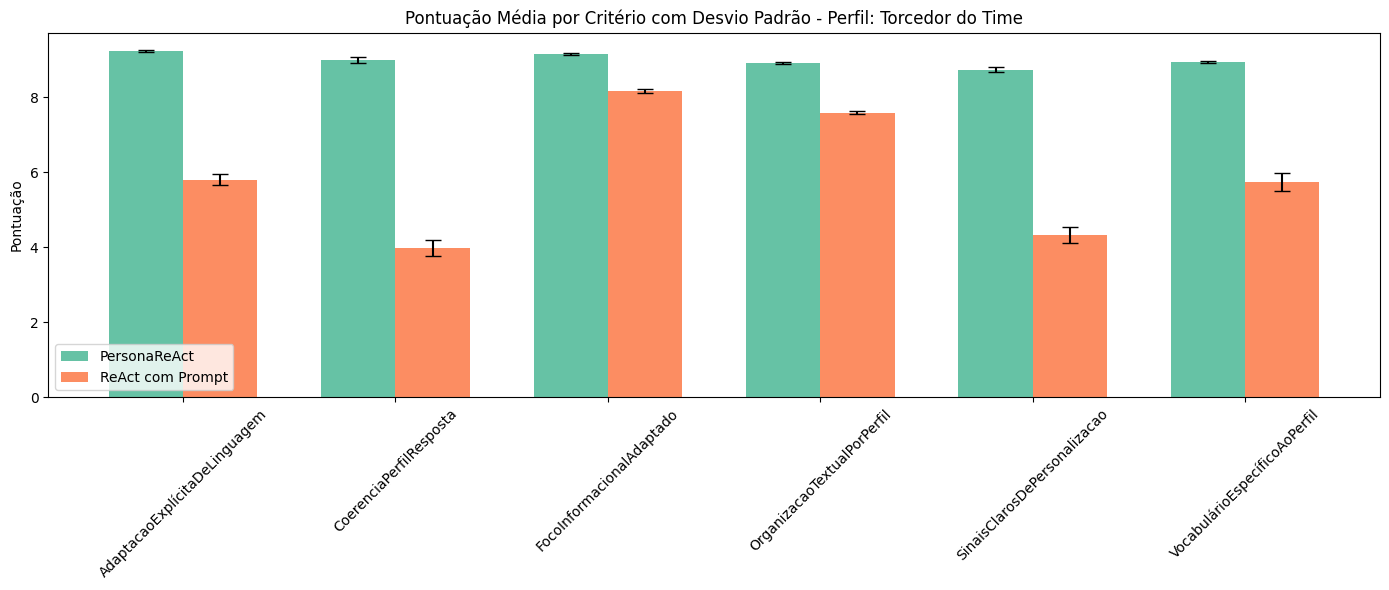

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Torcedor do Time")
ax.legend()
plt.tight_layout()
plt.show()

In [7]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,8.94,5.73,6.865483e-23,✅
1,FocoInformacionalAdaptado,9.15,8.17,1.516446e-25,✅
2,OrganizacaoTextualPorPerfil,8.91,7.58,3.607212e-29,✅
3,AdaptacaoExplícitaDeLinguagem,9.22,5.80,1.632452e-27,✅
4,CoerenciaPerfilResposta,9.00,3.98,1.823233e-28,✅
5,SinaisClarosDePersonalizacao,8.73,4.32,2.534683e-25,✅


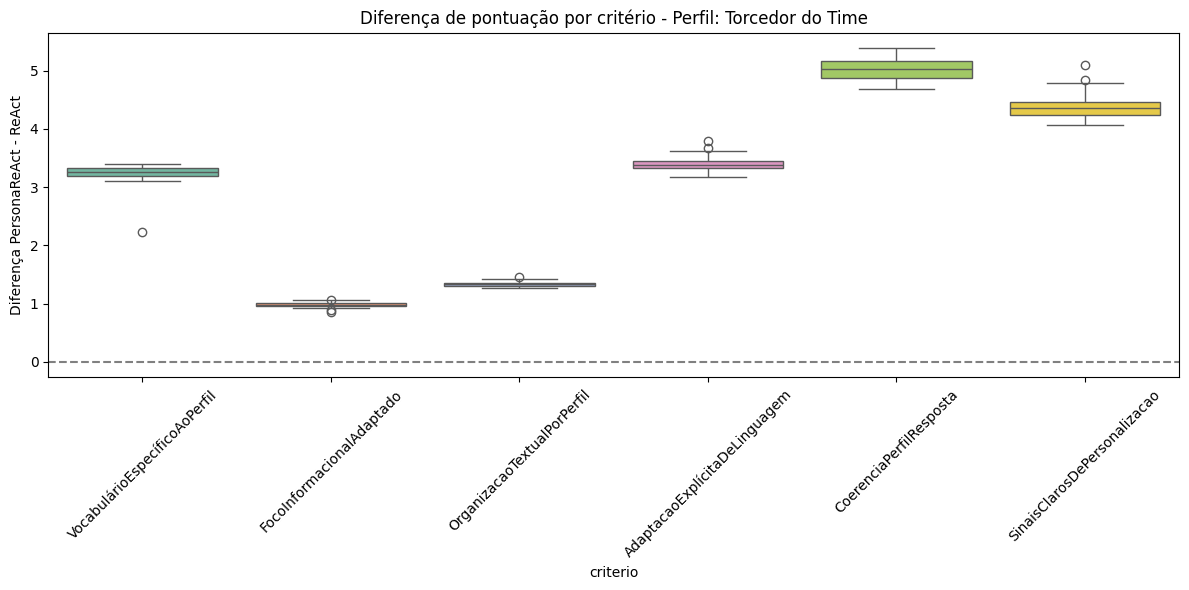

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Torcedor do Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

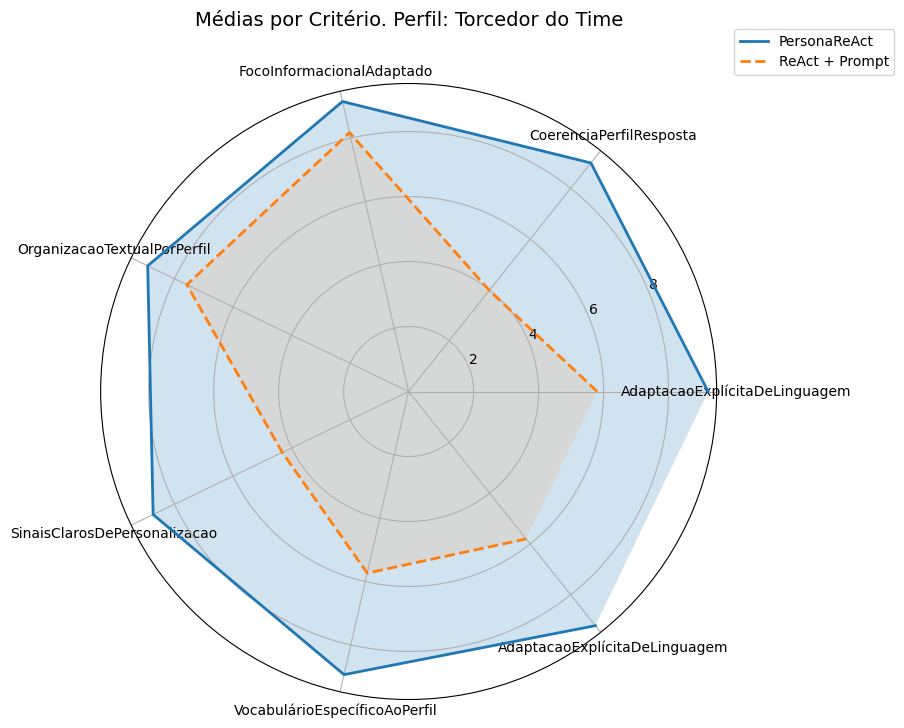

In [9]:
from math import pi

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]
categorias += [categorias[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles)
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Torcedor do Time", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

## Técnico do Time

Pergunta: "Qual jogador percorreu mais distância em alta intensidade durante a partida contra o Ceará no dia 1º de abril de 2023?"

In [16]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_3_tecnico.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais distância em alta ...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.44,9.84,-0.40
1,Qual jogador percorreu mais distância em alta ...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.29,9.85,-0.56
2,Qual jogador percorreu mais distância em alta ...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.44,9.85,-0.41
3,Qual jogador percorreu mais distância em alta ...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.21,9.87,-0.66
4,Qual jogador percorreu mais distância em alta ...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.31,9.87,-0.56


In [17]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.18,0.08,8.65,0.21
1,CoerenciaPerfilResposta,9.66,0.04,8.82,0.04
2,FocoInformacionalAdaptado,9.62,0.07,9.80,0.25
3,OrganizacaoTextualPorPerfil,9.16,0.05,8.49,0.22
4,SinaisClarosDePersonalizacao,8.23,0.18,4.49,0.08
5,VocabulárioEspecíficoAoPerfil,9.32,0.08,9.84,0.10


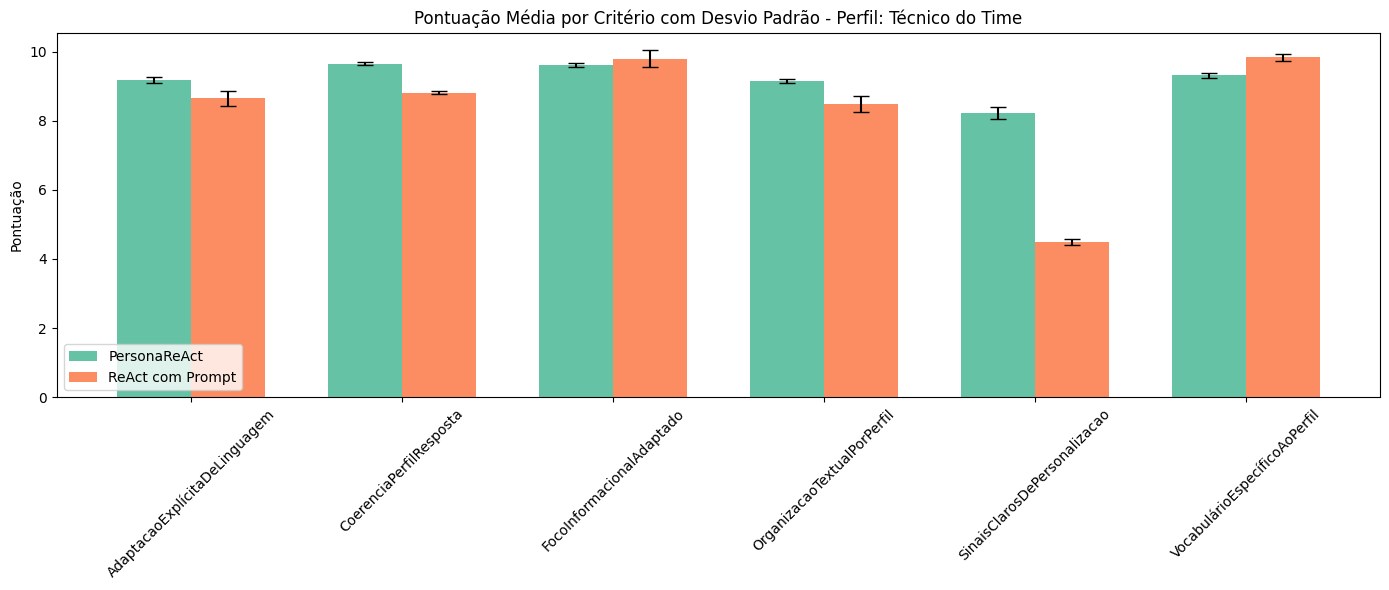

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Técnico do Time")
ax.legend()
plt.tight_layout()
plt.show()

In [19]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.32,9.84,8.027328e-13,✅
1,FocoInformacionalAdaptado,9.62,9.80,4.934843e-03,✅
2,OrganizacaoTextualPorPerfil,9.16,8.49,9.479907e-11,✅
3,AdaptacaoExplícitaDeLinguagem,9.18,8.65,2.422903e-09,✅
4,CoerenciaPerfilResposta,9.66,8.82,1.006357e-24,✅
5,SinaisClarosDePersonalizacao,8.23,4.49,4.410552e-26,✅


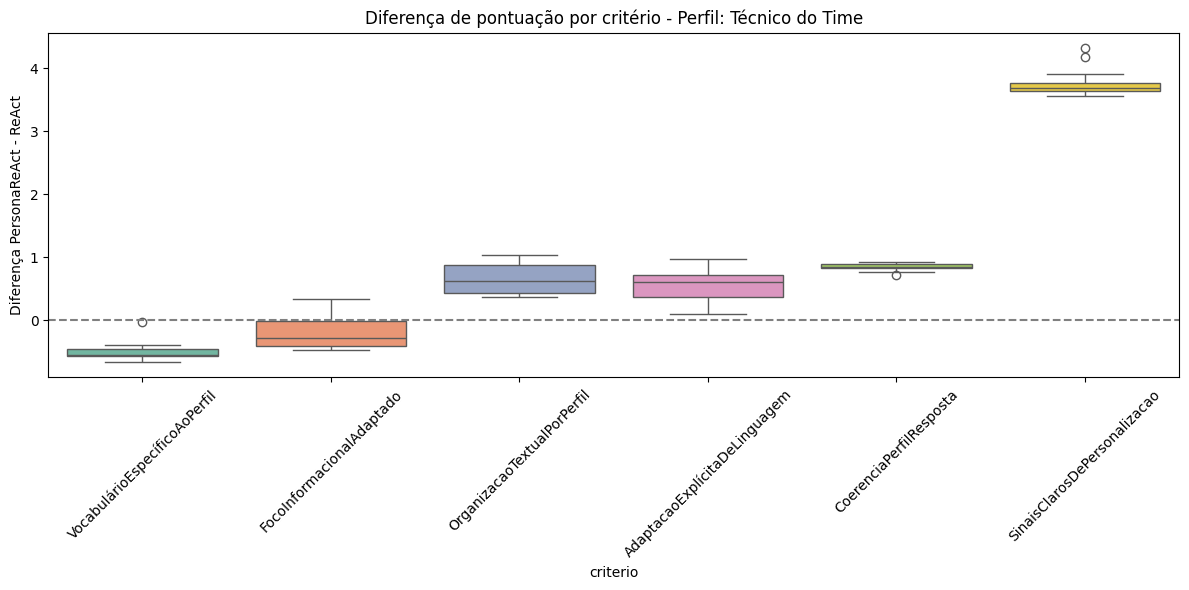

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Técnico do Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

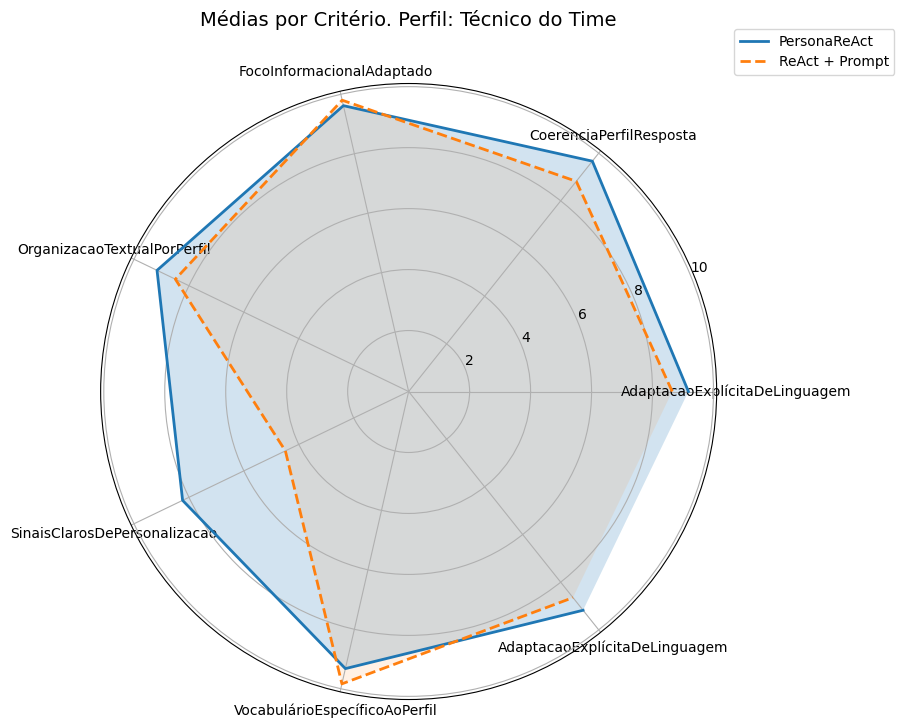

In [21]:
from math import pi

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]
categorias += [categorias[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles)
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Técnico do Time", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

## Narrador de Rádio

Pergunta: "Quais jogadores aceleraram o ritmo do jogo no dia 1º de abril de 2023 com suas arrancadas e dribles?"

In [22]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_3_narrador.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.18,9.14,0.04
1,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.19,9.08,0.11
2,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.18,9.10,0.08
3,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.32,9.18,0.14
4,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.17,9.17,0.00


In [23]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.07,0.03,8.17,0.27
1,CoerenciaPerfilResposta,9.15,0.07,9.18,0.08
2,FocoInformacionalAdaptado,9.23,0.03,9.59,0.03
3,OrganizacaoTextualPorPerfil,9.31,0.02,9.38,0.12
4,SinaisClarosDePersonalizacao,8.59,0.08,8.32,0.07
5,VocabulárioEspecíficoAoPerfil,9.20,0.03,9.11,0.04


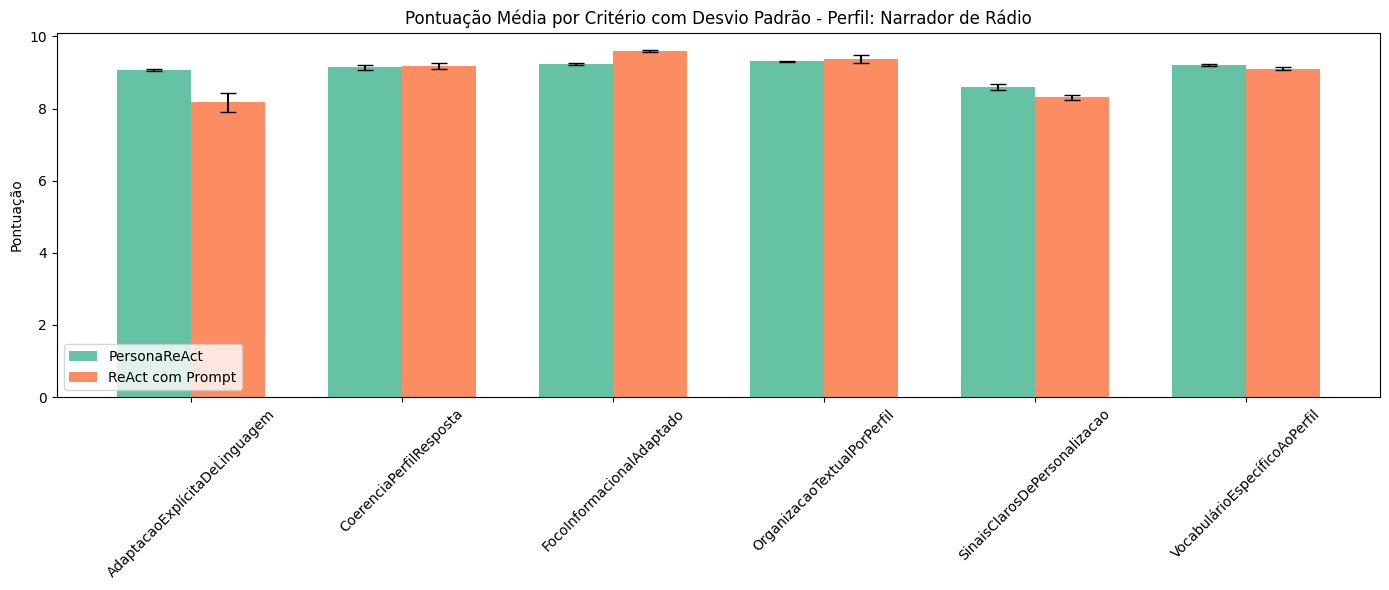

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Narrador de Rádio")
ax.legend()
plt.tight_layout()
plt.show()

In [25]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.20,9.11,1.012615e-08,✅
1,FocoInformacionalAdaptado,9.23,9.59,1.659397e-20,✅
2,OrganizacaoTextualPorPerfil,9.31,9.38,1.914824e-02,✅
3,AdaptacaoExplícitaDeLinguagem,9.07,8.17,6.658180e-12,✅
4,CoerenciaPerfilResposta,9.15,9.18,2.533324e-01,❌
5,SinaisClarosDePersonalizacao,8.59,8.32,7.146208e-12,✅


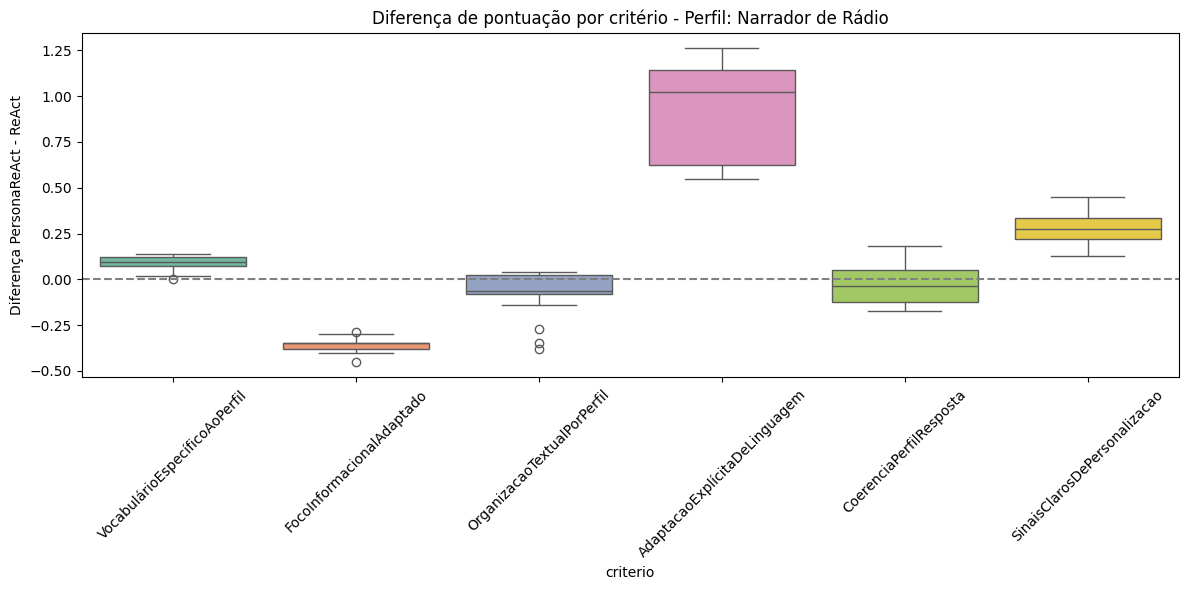

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Narrador de Rádio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

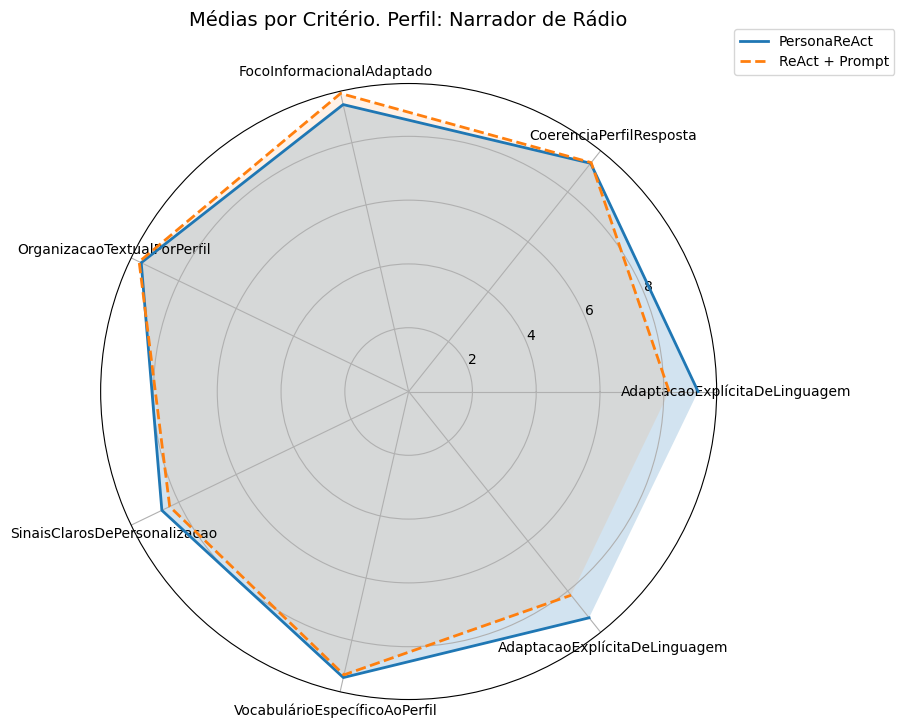

In [27]:
from math import pi

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]
categorias += [categorias[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles)
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Narrador de Rádio", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

## Jornalista Esportivo

Pergunta: "O que mais chamou atenção no desempenho de Bruno Pacheco no jogo contra o Ceará no dia 1º de abril de 2023?"

In [31]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_3_jornalista.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.00,8.59,0.41
1,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.02,8.62,0.40
2,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.02,8.51,0.51
3,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.10,8.48,0.62
4,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.08,8.48,0.60


In [32]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.26,0.09,8.90,0.08
1,CoerenciaPerfilResposta,9.16,0.02,9.49,0.11
2,FocoInformacionalAdaptado,9.67,0.05,9.21,0.09
3,OrganizacaoTextualPorPerfil,8.91,0.01,8.37,0.04
4,SinaisClarosDePersonalizacao,8.44,0.08,8.10,0.12
5,VocabulárioEspecíficoAoPerfil,9.04,0.03,8.54,0.06


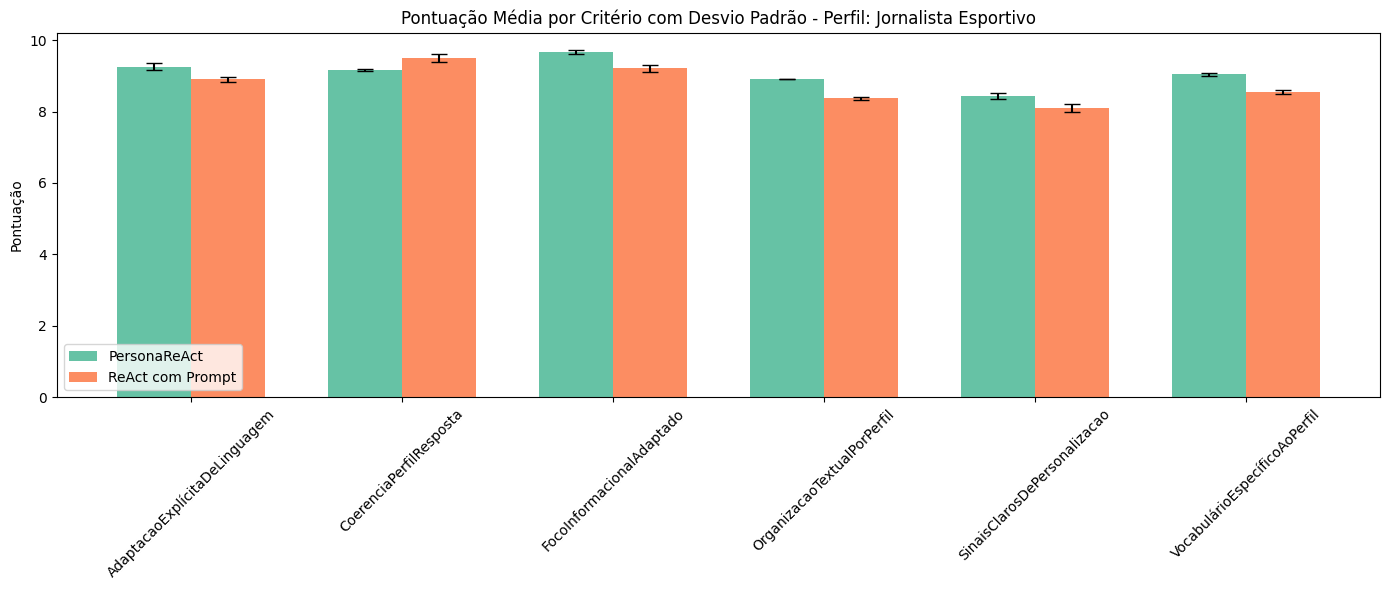

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Jornalista Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [34]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.04,8.54,2.734200e-17,✅
1,FocoInformacionalAdaptado,9.67,9.21,7.520603e-14,✅
2,OrganizacaoTextualPorPerfil,8.91,8.37,1.158469e-21,✅
3,AdaptacaoExplícitaDeLinguagem,9.26,8.90,2.139157e-09,✅
4,CoerenciaPerfilResposta,9.16,9.49,7.146411e-12,✅
5,SinaisClarosDePersonalizacao,8.44,8.10,7.669786e-09,✅


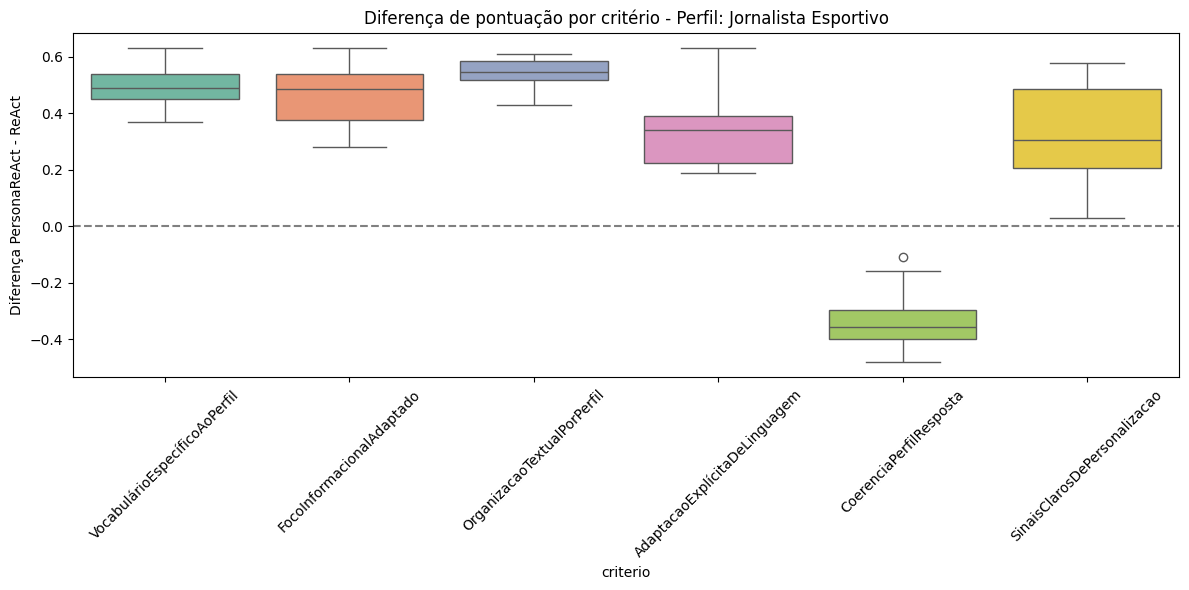

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Jornalista Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

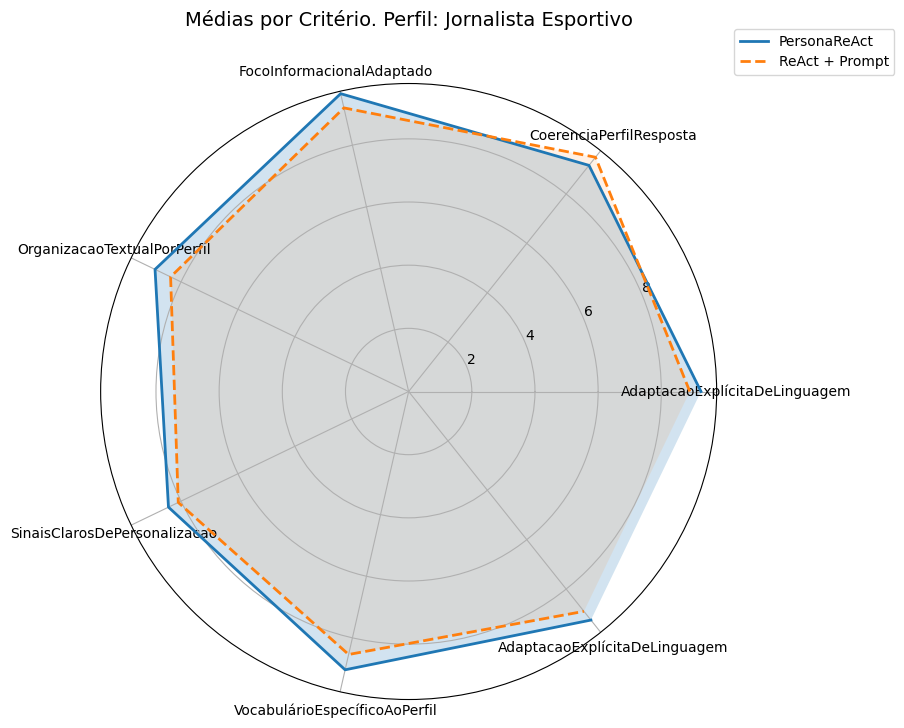

In [36]:
from math import pi

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]
categorias += [categorias[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles)
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Jornalista Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()